<a href="https://colab.research.google.com/github/vinithaudaiyar/Codsoft-data-science-Internship/blob/main/TItanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
titan_data=pd.read_csv('/content/tested.csv')

In [ ]:
titan_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titan_data.shape

(418, 12)

In [ ]:
titan_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [ ]:
titan_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titan_data = titan_data.drop(columns ='Cabin',axis=1)

In [ ]:
titan_data['Age'].fillna(titan_data['Age'].mean(),inplace=True)

In [ ]:
print(titan_data['Fare'].mode()[0])

7.75


In [ ]:
titan_data['Fare'].fillna(titan_data['Fare'].mode()[0],inplace=True)

In [ ]:
titan_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titan_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titan_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
titan_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
sns.set()


<Axes: xlabel='Survived', ylabel='count'>

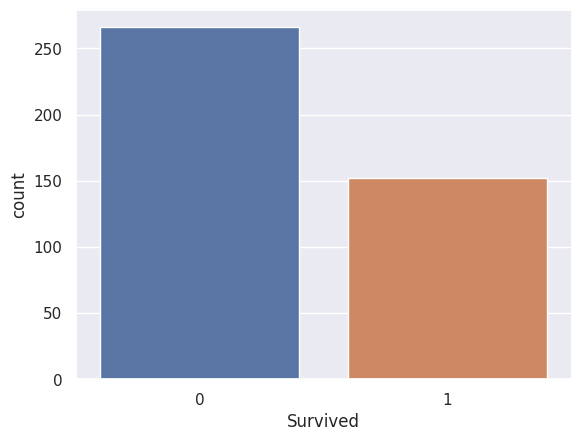

In [ ]:
sns.countplot(x='Survived',data = titan_data,)


<Axes: xlabel='Sex', ylabel='count'>

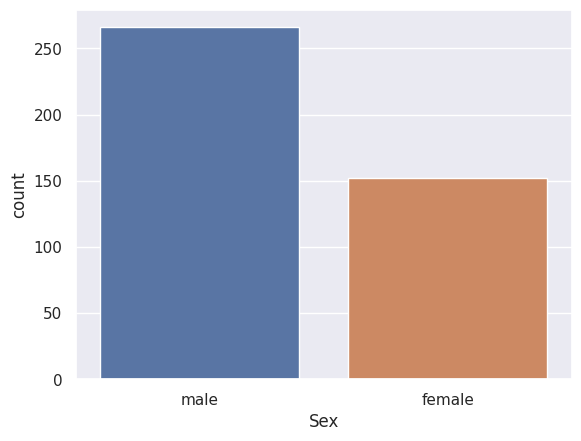

In [79]:
sns.countplot(x='Sex',data = titan_data,)

<Axes: xlabel='Pclass', ylabel='count'>

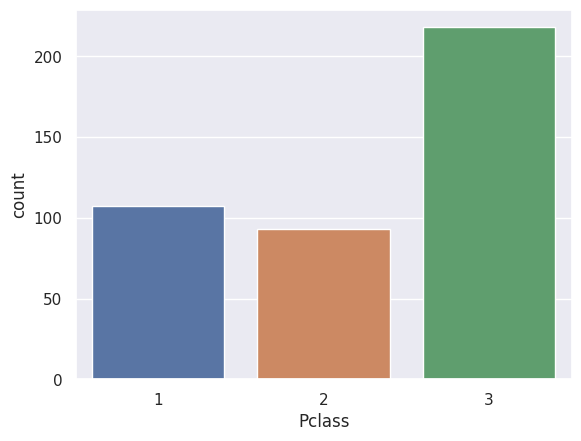

In [82]:
sns.countplot(x='Pclass',data = titan_data,)

<Axes: xlabel='Embarked', ylabel='count'>

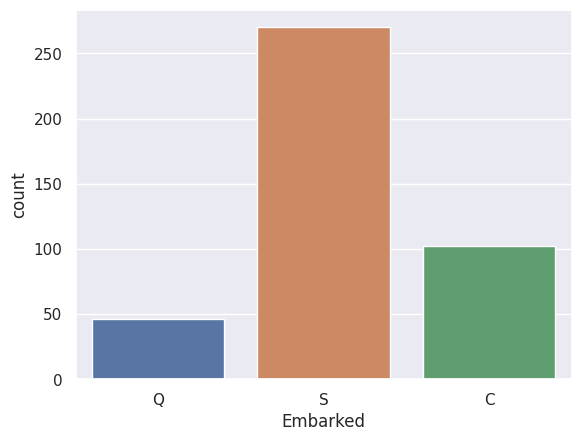

In [84]:
sns.countplot(x='Embarked',data = titan_data,)

In [87]:
titan_data.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [90]:
features=titan_data.drop(columns=['PassengerId','Name','Survived','Ticket'],axis=1)
print(features)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         2
1         3    0  47.00000      1      0    7.0000         0
2         2    1  62.00000      0      0    9.6875         2
3         3    1  27.00000      0      0    8.6625         0
4         3    0  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         0
414       1    0  39.00000      0      0  108.9000         1
415       3    1  38.50000      0      0    7.2500         0
416       3    1  30.27259      0      0    8.0500         0
417       3    1  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [92]:
target=titan_data['Survived']
print(target)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [96]:
f_train,f_test,t_train,t_test=train_test_split(features,target,test_size=0.2,random_state=3)

In [97]:
print(features.shape,f_train.shape,f_test.shape)

(418, 7) (334, 7) (84, 7)


In [98]:
model=LogisticRegression()

In [99]:
model.fit(f_train,t_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
f_train_prediction=model.predict(f_train)

In [101]:
print(f_train_prediction)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0
 1]


In [103]:
training_data_accuracy=accuracy_score(t_train,f_train_prediction)
print('the training data accuracy',training_data_accuracy)

the training data accuracy 1.0


In [104]:
f_test_prediction=model.predict(f_test)

In [105]:
print(f_test_prediction)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0]


In [107]:
test_data_accuracy=accuracy_score(t_test,f_test_prediction)
print('the training data accuracy',test_data_accuracy)


the training data accuracy 1.0
